In [57]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [110]:
import settings

In [111]:
api_key = settings.API_KEY

### Youtube API Data 

In [61]:
youtube = build('youtube', 'v3', developerKey=api_key)

In [62]:
# Method to get Video Details
def get_video_details(youtube, video_id):
    request = youtube.videos().list(part='snippet,statistics',id=video_id)
    response = request.execute()['items'][0]
    view_count = int(response['statistics'].get('viewCount',0))
    like_count = int(response['statistics'].get('likeCount',0))
    comment_count = int(response['statistics'].get('commentCount',0))
    tags = response['snippet'].get('tags', [])
    return view_count, like_count, comment_count, tags

In [63]:
get_video_details(youtube, 'UVL6hzTvzvE')

(899350,
 43677,
 3098,
 ['Positive',
  'Thinking',
  'thoughts',
  'best',
  'intelligence',
  'stress',
  'manage',
  'how to',
  'feelings',
  'latest',
  'fear',
  'attitude',
  'fearless',
  'motivational video',
  'spirituality',
  'students',
  'for students',
  'study',
  'studies',
  'practical',
  'tips',
  'motivation',
  'communication',
  'love',
  'confidence',
  'time',
  'loneliness',
  'depression',
  'anxiety',
  'akele',
  'rehna',
  'seekho',
  'video',
  'videos',
  'motivational speech',
  'speech',
  'overcome',
  'brain',
  'storm',
  'storming',
  'brainstorming',
  'discussion',
  'discussions',
  'talk',
  'talks',
  '2021',
  'latest 2021',
  '2022',
  'latest 2022',
  'education'])

### Search Videos From Youtube Data API

In [64]:
def get_video_search_data(youtube, query):
    video_title = []
    video_description = []
    channel_title = []
    published_at = []
    video_id = []
    like_count = []
    view_count = []
    comment_count = []
    tags = []
    request = youtube.search().list(part='snippet',q=query,type='video', maxResults=50)
    response = request.execute()
    nextPageToken = response.get('nextPageToken')
    for i in range(0,50):
        if nextPageToken is not None:
            request = youtube.search().list(part='snippet',q=query,type='video', pageToken = nextPageToken)
            response = request.execute()
            for resp in response['items']:
                video_title.append(resp['snippet']['title'])
                video_description.append(resp['snippet']['description'])
                channel_title.append(resp['snippet']['channelTitle'])
                published_at.append(resp['snippet']['publishedAt'])
                video_id_ = resp['id']['videoId']
                view_count_, like_count_, comment_count_, tags_ = get_video_details(youtube, video_id_)
                video_id.append(video_id_)
                view_count.append(view_count_)
                like_count.append(like_count_)
                comment_count.append(comment_count_)
                tags.append(tags_)
        nextPageToken = response.get('nextPageToken')
    return pd.DataFrame({'video_title': video_title, 
                         'published_at': published_at,
                         'video_description': video_description, 
                         'channel_title': channel_title,
                        'video_id': video_id,
                        'view_count':view_count,
                        'like_count': like_count,
                        'comment_count': comment_count,
                        'tags': tags})    

In [65]:
df = get_video_search_data(youtube, "education")

In [66]:
df

video_title          published_at  \
0    Education Loan: What happens if Education Loan...  2022-06-24T13:30:10Z   
1    Education Minister-க்கே Slate, Pencil-ஆ🤣 - Udh...  2022-06-12T09:57:05Z   
2    Education Is The One Of The Blessings Of Life ...  2020-07-22T03:38:23Z   
3    ENGLISH SPEECH | SHAKIRA: Education Changes th...  2020-01-18T02:00:02Z   
4    20 June 2022 | The Hindu Newspaper analysis | ...  2022-06-20T01:32:18Z   
..                                                 ...                   ...   
245  Otis &amp; Maeve: The Story So Far PART ONE | ...  2019-08-09T16:47:58Z   
246  Your genes affect your education. Here’s why t...  2022-06-09T13:00:02Z   
247  Color Mixing Magic | Educational Kids Songs &a...  2021-10-06T14:00:20Z   
248  SEX EDUCATION (Temporada 3) RESUMEN EN 14 MINUTOS  2021-09-21T22:37:51Z   
249  Germany की education क्यों है खास😮| A2 Motivat...  2022-05-10T13:30:12Z   

                                     video_description  \
0    In this video tells about how to apply educati...   
1    Education Minister-க்கே Slate, Pencil-ஆ   - Ud...   
2    Malala Yousafzai is a Pakistani activist for f...   
3    Learn English with Shakira. The pop star, who ...   
4    thehinduanalysis #thehindu #upsc #agneepath #a...   
..                                                 ...   
245  Otis & Maeve's story so far has been full of u...   
246  This interview is an episode from The Well, ou...   
247  OH NO! Baby John Doesn't Have the color purple...   
248  Resumen de sex education 3, sex education 3 re...   
249  Download the CONKER APP NOW - Google Play Stor...   

                                 channel_title     video_id  view_count  \
0                       Theneer Idaivelai Aram  gL4jBP6mENo       30692   
1                Galatta Tamil | கலாட்டா தமிழ்  L-tVPZqOws4     2604293   
2                               Unknown Editor  aXZPJ8yGbwU     1260211   
3                             English Speeches  U8iy5zvXhJc     2359025   
4                       Deepak Yadav Education  E7NMevs6_bk       51826   
..                                         ...          ...         ...   
245                     Still Watching Netflix  9cIdauxVsHE    10141027   
246                                  Big Think  6Y-PeuGFaHc      100920   
247  Little Angel: Nursery Rhymes & Kids Songs  qTFo3bKyy5s    11093518   
248                                 En Minutos  e87WjSCRGuQ      312162   
249            A2 Motivation by {Arvind Arora}  VZcQLeAD__0      731978   

     like_count  comment_count  \
0          1646             89   
1         86850           1630   
2         42608            486   
3         62398            997   
4          4705            195   
..          ...            ...   
245      102054           3245   
246        2516            359   
247       57970              0   
248       11475            421   
249       85693            155   

                                                  tags  
0    [education loan, education loan tamil, educati...  
1    [Udhayanidhi and anbil mahesh galatta crown, u...  
2    [education, education motivation, education mo...  
3    [safd198yjmkkvz0189hystty, english, speech, en...  
4       [#UPSC #TheHinduAnalysis #CurrentAffairsToday]  
..                                                 ...  
245  [Netflix, Netflix Original Series, Netflix Ser...  
246  [Education, Educational Videos, Videos, Faster...  
247  [Art class, Blue, Color Song, Colour, Green, K...  
248  [en minutos, resumen en 10 minutos, resumen en...  
249  [Free Education in Germany, Germany for Indian...  

[250 rows x 9 columns]

In [67]:
df.head()

video_title          published_at  \
0  Education Loan: What happens if Education Loan...  2022-06-24T13:30:10Z   
1  Education Minister-க்கே Slate, Pencil-ஆ🤣 - Udh...  2022-06-12T09:57:05Z   
2  Education Is The One Of The Blessings Of Life ...  2020-07-22T03:38:23Z   
3  ENGLISH SPEECH | SHAKIRA: Education Changes th...  2020-01-18T02:00:02Z   
4  20 June 2022 | The Hindu Newspaper analysis | ...  2022-06-20T01:32:18Z   

                                   video_description  \
0  In this video tells about how to apply educati...   
1  Education Minister-க்கே Slate, Pencil-ஆ   - Ud...   
2  Malala Yousafzai is a Pakistani activist for f...   
3  Learn English with Shakira. The pop star, who ...   
4  thehinduanalysis #thehindu #upsc #agneepath #a...   

                   channel_title     video_id  view_count  like_count  \
0         Theneer Idaivelai Aram  gL4jBP6mENo       30692        1646   
1  Galatta Tamil | கலாட்டா தமிழ்  L-tVPZqOws4     2604293       86850   
2                 Unknown Editor  aXZPJ8yGbwU     1260211       42608   
3               English Speeches  U8iy5zvXhJc     2359025       62398   
4         Deepak Yadav Education  E7NMevs6_bk       51826        4705   

   comment_count                                               tags  
0             89  [education loan, education loan tamil, educati...  
1           1630  [Udhayanidhi and anbil mahesh galatta crown, u...  
2            486  [education, education motivation, education mo...  
3            997  [safd198yjmkkvz0189hystty, english, speech, en...  
4            195     [#UPSC #TheHinduAnalysis #CurrentAffairsToday]

In [68]:
df.dtypes

video_title          object
published_at         object
video_description    object
channel_title        object
video_id             object
view_count            int64
like_count            int64
comment_count         int64
tags                 object
dtype: object

In [69]:
df['channel_title'].value_counts()

MY CHSE CLASS : HKSIR                   10
Still Watching Netflix                  10
It's AumSum Time                        10
Blippi - Educational Videos for Kids     9
Samrat Exclusive                         6
                                        ..
Gs Planet Institute                      1
Financial Education                      1
CBS Mornings                             1
Octonauts                                1
PBS NewsHour                             1
Name: channel_title, Length: 149, dtype: int64

In [70]:
df['view_count'].nlargest(10)

236    264616808
215    222216524
25     117140700
150    112062452
238    108089378
226     96114953
232     96114953
218     93093378
237     58019454
6       47677271
Name: view_count, dtype: int64

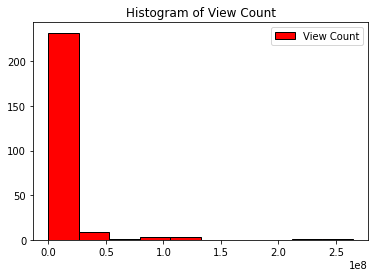

In [71]:
plt.hist(df['view_count'], color='red', edgecolor='black', label='View Count')
plt.title('Histogram of View Count')
plt.legend()

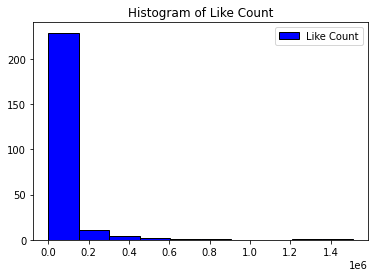

In [72]:
plt.hist(df['like_count'], color='blue', edgecolor='black', label='Like Count')
plt.title("Histogram of Like Count")
plt.legend()

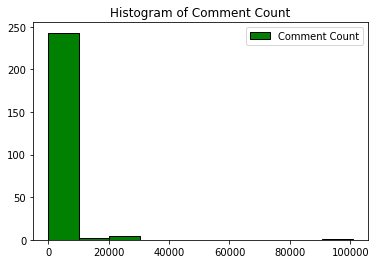

In [73]:
plt.hist(df['comment_count'], color='green', edgecolor='black', label='Comment Count')
plt.title("Histogram of Comment Count")
plt.legend()

In [74]:
title_df = df.loc[df['channel_title'].value_counts().nlargest(10)]

In [75]:
title_df

video_title          published_at  \
10  Preschool Learning Video with Lots of Fun Educ...  2016-12-09T18:29:48Z   
10  Preschool Learning Video with Lots of Fun Educ...  2016-12-09T18:29:48Z   
10  Preschool Learning Video with Lots of Fun Educ...  2016-12-09T18:29:48Z   
9   Education meaning in hindi || education ka mat...  2021-01-19T02:34:35Z   
6   Preschool Learning Video with Lots of Fun Educ...  2016-12-09T18:29:48Z   
5   +2 2ND YEAR EDUCATION | Chapter 1 Education | ...  2021-06-15T13:30:11Z   
5   +2 2ND YEAR EDUCATION | Chapter 1 Education | ...  2021-06-15T13:30:11Z   
4   20 June 2022 | The Hindu Newspaper analysis | ...  2022-06-20T01:32:18Z   
3   ENGLISH SPEECH | SHAKIRA: Education Changes th...  2020-01-18T02:00:02Z   
3   ENGLISH SPEECH | SHAKIRA: Education Changes th...  2020-01-18T02:00:02Z   

                                    video_description  \
10  Best Learning Video Compilation for Kids - Hou...   
10  Best Learning Video Compilation for Kids - Hou...   
10  Best Learning Video Compilation for Kids - Hou...   
9   wordmeaning #meaning #vocabulary education mea...   
6   Best Learning Video Compilation for Kids - Hou...   
5   MY CHSE CLASS : HKSIR TELEGRAM LINK https://t....   
5   MY CHSE CLASS : HKSIR TELEGRAM LINK https://t....   
4   thehinduanalysis #thehindu #upsc #agneepath #a...   
3   Learn English with Shakira. The pop star, who ...   
3   Learn English with Shakira. The pop star, who ...   

                                       channel_title     video_id  view_count  \
10  Genevieve's Playhouse - Learning Videos for Kids  XobhUpv1ttg    47677271   
10  Genevieve's Playhouse - Learning Videos for Kids  XobhUpv1ttg    47677271   
10  Genevieve's Playhouse - Learning Videos for Kids  XobhUpv1ttg    47677271   
9                                       Yellow Words  WOmfEtd62aY      116276   
6   Genevieve's Playhouse - Learning Videos for Kids  XobhUpv1ttg    47677271   
5                              MY CHSE CLASS : HKSIR  cD7efruQm60       48154   
5                              MY CHSE CLASS : HKSIR  cD7efruQm60       48154   
4                             Deepak Yadav Education  E7NMevs6_bk       51826   
3                                   English Speeches  U8iy5zvXhJc     2359025   
3                                   English Speeches  U8iy5zvXhJc     2359025   

    like_count  comment_count  \
10       53251              0   
10       53251              0   
10       53251              0   
9          832             15   
6        53251              0   
5         1962            111   
5         1962            111   
4         4705            195   
3        62398            997   
3        62398            997   

                                                 tags  
10  [hour long videos, long videos for kids, best ...  
10  [hour long videos, long videos for kids, best ...  
10  [hour long videos, long videos for kids, best ...  
9   [एजुकेशन, एजुकेशन का हिंदी अर्थ, एजुकेशन का मत...  
6   [hour long videos, long videos for kids, best ...  
5   [Contribution of Educationists, Sikhyabit nka ...  
5   [Contribution of Educationists, Sikhyabit nka ...  
4      [#UPSC #TheHinduAnalysis #CurrentAffairsToday]  
3   [safd198yjmkkvz0189hystty, english, speech, en...  
3   [safd198yjmkkvz0189hystty, english, speech, en...

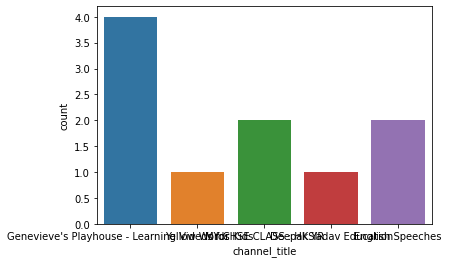

In [76]:
sns.countplot(data=title_df, x='channel_title')
plt.rcParams["figure.figsize"] = (20,8)

In [77]:
for i in df['tags']:
    print(i)

['education loan', 'education loan tamil', 'education loan online', 'education loan apply online tamil', 'education loan online india', 'education loan process', 'education loan sbi bank', 'education loan sbi bank 2022', 'education loan for mba', 'education loan for engineering', 'education loan for arts and science in tamil nadu', 'education loan for abroad', 'education loan for mbbs in india', 'education loan interest', 'education loan interest calculation', 'கல்வி கடன் தள்ளுபடி 2022', 'கல்வி கடன்', 'bank loan']
['Udhayanidhi and anbil mahesh galatta crown', 'udhayanidhi and anbil mahesh award function', 'anbil mahesh poyyamozhi and udhayanidhi', 'anbil mahesh and udhayanidhi relationship', 'anbil mahesh poyyamozhi and udhayanidhi whatsapp status', 'udhayanidhi stalin and anbil mahesh interview', 'anbil mahesh poyyamozhi and udhayanidhi stalin', 'udhayanidhi stalin and anbil mahesh speech', 'sivakarthikeyan udhayanidhi', 'nbil mahesh & udhayanithi game', 'sivakarthikeyan', 'tamil nad

In [78]:
df.sort_values(by=['view_count', 'like_count', 'comment_count'], ascending=[False, False, False], inplace=True)

In [79]:
df.head()

video_title          published_at  \
236  Learning With Blippi At Kinderland Indoor Play...  2020-10-08T13:04:58Z   
215         🔴Great Educational Toddler Toys for Kids!🔴  2017-06-27T04:34:41Z   
25   Nastya and dad are learning the Alphabet and N...  2021-01-02T06:00:05Z   
150  1 Hour of Blippi Educational Videos for Toddle...  2018-11-17T22:27:38Z   
238  Call for Help When You&#39;re in Trouble | Emo...  2018-04-10T05:00:03Z   

                                     video_description  \
236  Blippi plays and learns at an indoor playgroun...   
215  Best Color Learning Videos for Toddlers - Pres...   
25   Nastya and dad learn the Alphabet and Numbers....   
150  Blippi brings you on a Blippi compilation vide...   
238  Subscribe to Robocar POLI TV here! https://bit...   

                                        channel_title     video_id  \
236              Blippi - Educational Videos for Kids  Gh-XKNuvvC4   
215  Genevieve's Playhouse - Learning Videos for Kids  e4VyhryO_0c   
25                                        Like Nastya  ocWWX7EDeWY   
150              Blippi - Educational Videos for Kids  O1PnPqy1p7o   
238                                   Robocar POLI TV  hFNE3pG_Ckg   

     view_count  like_count  comment_count  \
236   264616808      805101              0   
215   222216524      289891              0   
25    117140700      620161              0   
150   112062452      116950              0   
238   108089378      396385              0   

                                                  tags  
236  [Blippi, Blippi videos, Blippi play place, Bli...  
215  [best learning video for kids, best videos for...  
25   [learn the alphabet, numbers, numbers 1 to 10,...  
150  [Blippi, Blippi videos, Blippi songs, educatio...  
238  [robocarpoli, carro, coche, for kids, kids, ki...